In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy import stats

If a markov is *irreducible* and *aperiodic*, then it has a limiting distribution.

- Irreducible: you can get from anywhere to anywhere else
- Aperiodic: nodes don't have parities

In [13]:
P = np.array([
    [1/4, 1/2, 1/4],
    [1/3, 0, 2/3],
    [1/2, 0, 1/2]
])

P = P.T
P

array([[0.25      , 0.33333333, 0.5       ],
       [0.5       , 0.        , 0.        ],
       [0.25      , 0.66666667, 0.5       ]])

In [14]:
eig = np.linalg.eig(P)
eig.eigenvalues

array([ 1.   +0.j        , -0.125+0.26020825j, -0.125-0.26020825j])

In [16]:
exp = P**100
exp
# np.array([1, 0, 0]) @ exp

array([[6.22301528e-61, 1.94032522e-48, 7.88860905e-31],
       [7.88860905e-31, 0.00000000e+00, 0.00000000e+00],
       [6.22301528e-61, 2.45965443e-18, 7.88860905e-31]])

# Gambler's ruin

We're gonna do a series of bets against the bank. If we win, money goes up by 1. If we lose, money goes down by 1. We win with probability $P$

$$
\begin{bmatrix}
1 & 0 & 0 & ... & 0 \\
1 - p & 0 & p & ... & 0 \\
0 & 1 - p & 0 & p & ... & 0 \\

\end{bmatrix}
$$

This is not irreducible. If you start at zero, you have nothing to bet. If you start at $N$, the bank has nothing to bet.

In [34]:
N = 5

P = np.zeros((N, N))
P[0, 0] = 1
P[-1, -1] = 1

p = 0.4

for i in range(1, N - 1):
    P[i, i + 1] = 1 - p
    P[i, i - 1] = p

P

array([[1. , 0. , 0. , 0. , 0. ],
       [0.4, 0. , 0.6, 0. , 0. ],
       [0. , 0.4, 0. , 0.6, 0. ],
       [0. , 0. , 0.4, 0. , 0.6],
       [0. , 0. , 0. , 0. , 1. ]])

What's you probability of winning? Let $Q(n)$ be the probability of winning from state $n$?

$$
Q(n) = q Q(n - 1) + p Q(n + 1)
$$

$$
Q(0) = 0
$$

$$
Q(1) = 1
$$

This is a different equation. So, we solve by assuming $Q(n) = r^n$.

$$
r^n = qr^{n - 1} + pr^{n + 1}
$$

$$
r = q + pr^2
$$

$$
pr^2 - r + q = 0
$$

$r = 1$ is a solution

So, $(r - 1)(pr - q) = 0$

$$r = 1, {q\over p}$$

$$Q(n) = r_1 + r_2 ({q \over p})^n$$

Solve for the boundary conditions.

$$
C({q \over p})^n - 1
$$

$$
Q(n) = {(qp^{-1})^n - 1 \over (qp^{-1})^N - 1}
$$

?????

If $q > p$, this is increasing in $n$, so as you get more money, you are more likely to win.

If $p = q = 0.5$. The above is undefined. Instead, we get the repeated root 1. So, ...??

Somehow,

$$
Q(n) = {n \over N}
$$

/var/folders/l_/zjyw1l0d37x3lbbq6x4vvs_00000gn/T/ipykernel_17037/4090834465.py:6: RuntimeWarning: invalid value encountered in divide
  plt.plot(n, (q_p**n - 1) / (q_p**N - 1), marker='o', label=f"$p = {p}$")


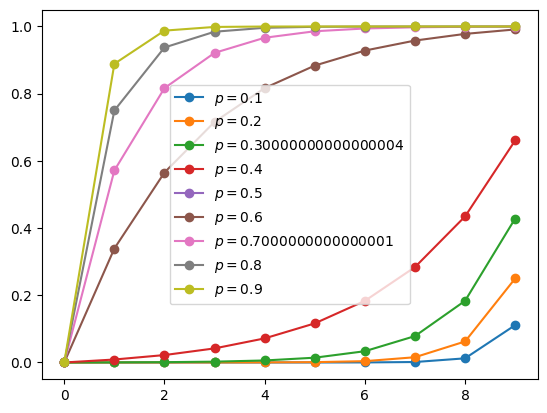

In [44]:
N = 10
n = np.arange(N)
for p in np.linspace(0.1, 0.9, 9):
    q = 1 - p
    q_p = q / p
    plt.plot(n, (q_p**n - 1) / (q_p**N - 1), marker='o', label=f"$p = {p}$")

plt.legend()

In [46]:
foo = np.array([
    [0, 1],
    [1, 0]
])

np.linalg.eig(foo)

EigResult(eigenvalues=array([ 1., -1.]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))

# Age Cohorts in Population Models

We have discrete time population model with three cohorts.

In [64]:
# cohort 1 is old, cohort 2 is mid, cohort 3 is young

a_11 = 0.05 # old cohort death rate
a_12 = 0.03 # old cohort intro rate, survival rate of mid cohort
a_22 = 0.4 # mid cohort death rate
a_23 = 0.5 # mid cohort intro rate, survival rate of young cohort
a_31 = 0.6 # young cohort intro rate, survival rate of old cohort
a_33 = 0.7 # young cohort death rate

# # values he had in class
# A = np.array([
#     [0.95, 0.03, 0],
#     [0, 9.86, 0.05],
#     [0.02, 0.05, ]
# ])

A = np.array([
    [1 - a_11, a_12, 0],
    [0, 1 - a_22, a_23],
    [a_31, 0, 1 - a_33]
])
A

array([[0.95, 0.03, 0.  ],
       [0.  , 0.6 , 0.5 ],
       [0.6 , 0.  , 0.3 ]])

In [65]:
normed_A = A / A.sum(axis=1).reshape(-1, 1)
normed_A

array([[0.96938776, 0.03061224, 0.        ],
       [0.        , 0.54545455, 0.45454545],
       [0.66666667, 0.        , 0.33333333]])

In [57]:
normed_A**20

array([[3.48678440e-11, 1.15292150e-02, 6.72749995e+00],
       [6.72749995e+00, 9.53674316e-07, 3.65615844e-05],
       [3.48678440e-11, 1.21576655e-01, 3.65615844e-05]])